# The Quarterly Japanese Economic Model (Q-JEM)
This workbook implement the "The Quarterly Japanese Economic Model (Q-JEM): 2019 version". 

Press **Space** to proceed. Press **Shift-space** to go back 

In code cells you press Shift-Enter to evaluate your code.

You can always use smaller / larger fonts with keyboard shortcuts like **Alt +** and **Alt -** or similar (it could be Ctrl instead of Alt depending on the platform you are on). If the font is messed up, it helps to make it larger/smaller

If you want to leave the slideshow and return to the notebook, just press the upper left **X** 


At http://www.boj.or.jp/en/research/wps_rev/wps_2019/wp19e07.htm/ you will find the working paper describing 
the model and a zipfile containing all the relevant information needed to use the model. 

The model logic has been transformed from Eview equation to ModelFlow Business logic and the dataseries has been transformed to a Pandas Dataframe. 

In this workbook the impulse responses from the working paper section 3.1.1, 3.1.2, 3.1.3, and 3.1.4 has been recreated. 

The quarters has been rebased to 2001q1 to 2009q4

## Import Python libraries

In [1]:
import pandas as pd 

import modelmf
from modelclass import model
model.modelflow_auto()

## Create model and dataframe 

In [2]:
mqjem, baseline = model.modelload('qjem.pcim',run=1)

file read:  qjem.pcim


## Define some variable labels 
This gives more meaningful legends 

In [3]:
legend = {
'GDP'   : 'Real gross domestic product, S.A.',
'CP'    : 'Real private consumption, S.A.',
'U'     : 'Unemployment rate, S.A.',
'PGDP'  : 'GDP deflator',
'USGDP' : 'Real gross domestic product of the United States, S.A.',
'NUSGDP': 'Output gap of the rest of the world',
'EX': 'Real exports of goods and services, S.A.',
'IM' : 'Real imports of goods and services, S.A.',
'INV' : 'Real private non-residential investment, S.A.',
'CORE_CPI' : 'Consumer price index (all items, less fresh food), S.A.'
}

## Make experiment with Foreign GDP +1 percent point. 

In [4]:
instruments = [ 'V_NUSGAP','V_USGAP']
target      = baseline.loc['2005q1':,['USGDP','NUSGDP']].mfcalc('''\
USGDP  = USGDP*1.01
NUSGDP = NUSGDP*1.01
''',silent=1)
mqjem.invert(baseline,target,instruments); 

Finding instruments :   0%|          | 0/20

## Display the results 

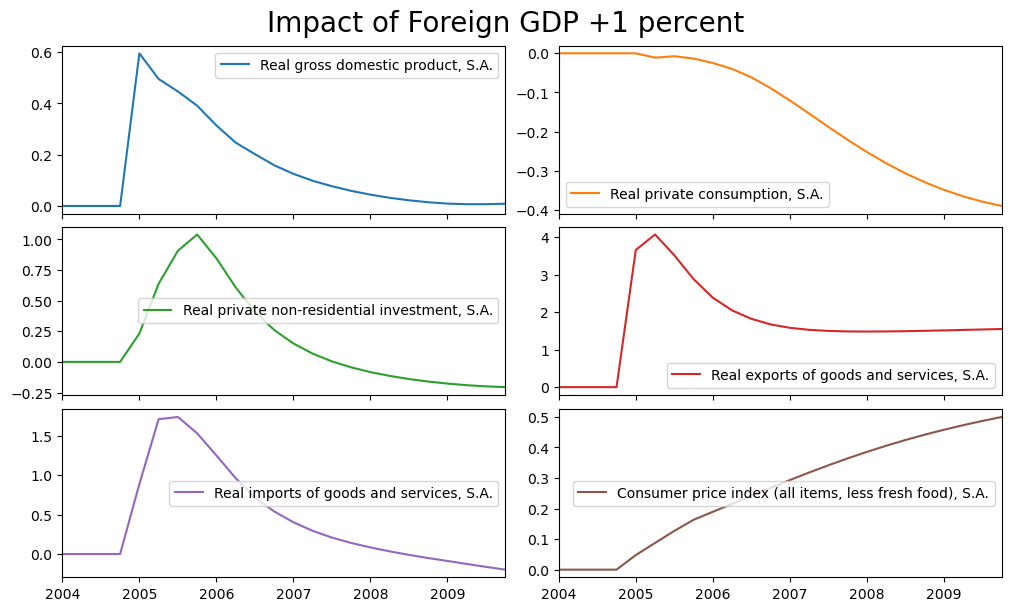

In [6]:
disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of Foreign GDP +1 percent',top=0.9)

## Lower Oil prices  

In [7]:
instruments = [ 'V_POIL']
target      = baseline.loc['2005q1':,['POIL']].mfcalc('''\
POIL  = POIL*0.9
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

Finding instruments :   0%|          | 0/20

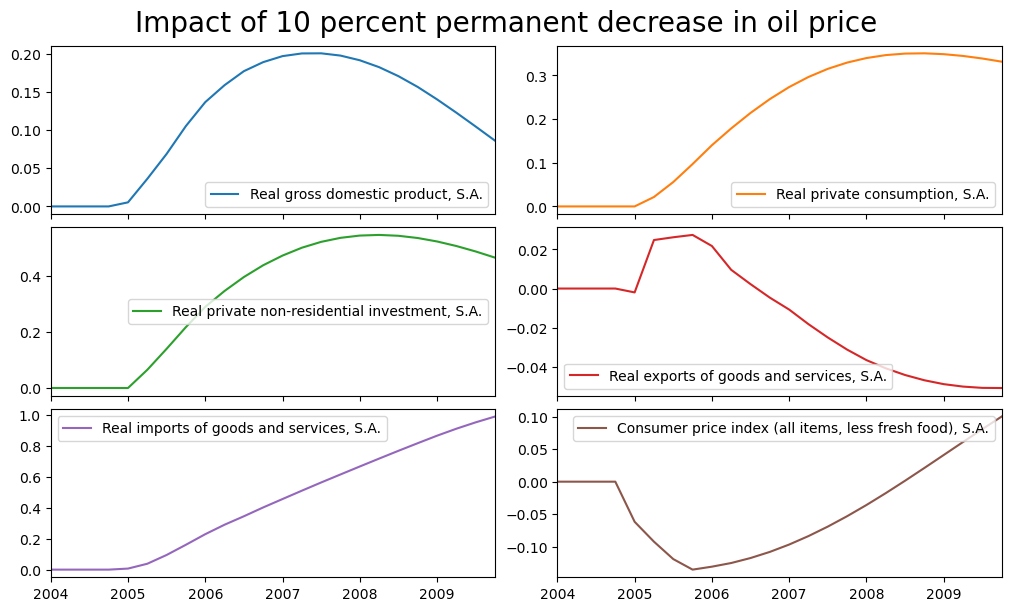

In [8]:
disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of 10 percent permanent decrease in oil price',top=0.9)

## Combine the two previous experiments 

In [9]:
instruments = [ 'V_POIL','V_NUSGAP','V_USGAP']
target      = baseline.loc['2005q1':,['POIL','USGDP','NUSGDP']].mfcalc('''\
POIL  = POIL*0.9
USGDP  = USGDP*1.01
NUSGDP = NUSGDP*1.01
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

Finding instruments :   0%|          | 0/20

## A permanent depreciation of exchange rates. 

Finding instruments :   0%|          | 0/20

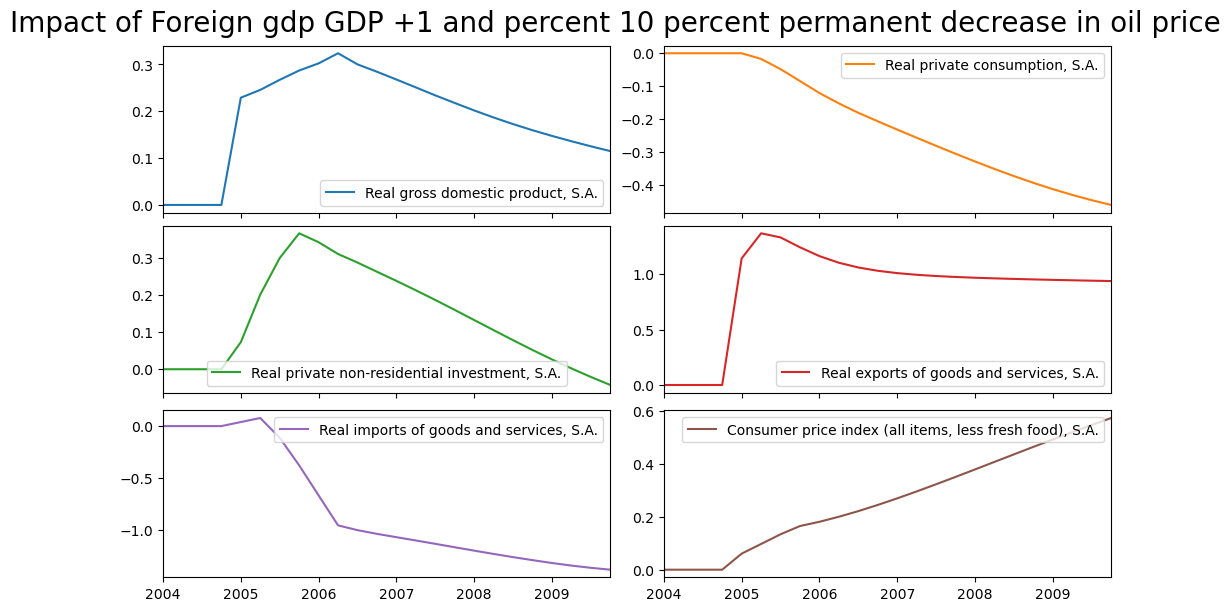

In [11]:
instruments = [ 'V_FXYEN']
target      = baseline.loc['2005q1':,['FXYEN']].mfcalc('''\
FXYEN = FXYEN*1.1
''',silent=1)

resalt = mqjem.invert(baseline,target,instruments,silent=1)

disp = mqjem['GDP CP INV EX IM CORE_CPI'].difpctlevel.rename(legend).plot(
    colrow=2,sharey=0,title='Impact of Foreign gdp GDP +1 and percent 10 percent permanent decrease in oil price',top=0.9)

## Draw the causal structure current periode, used when solving

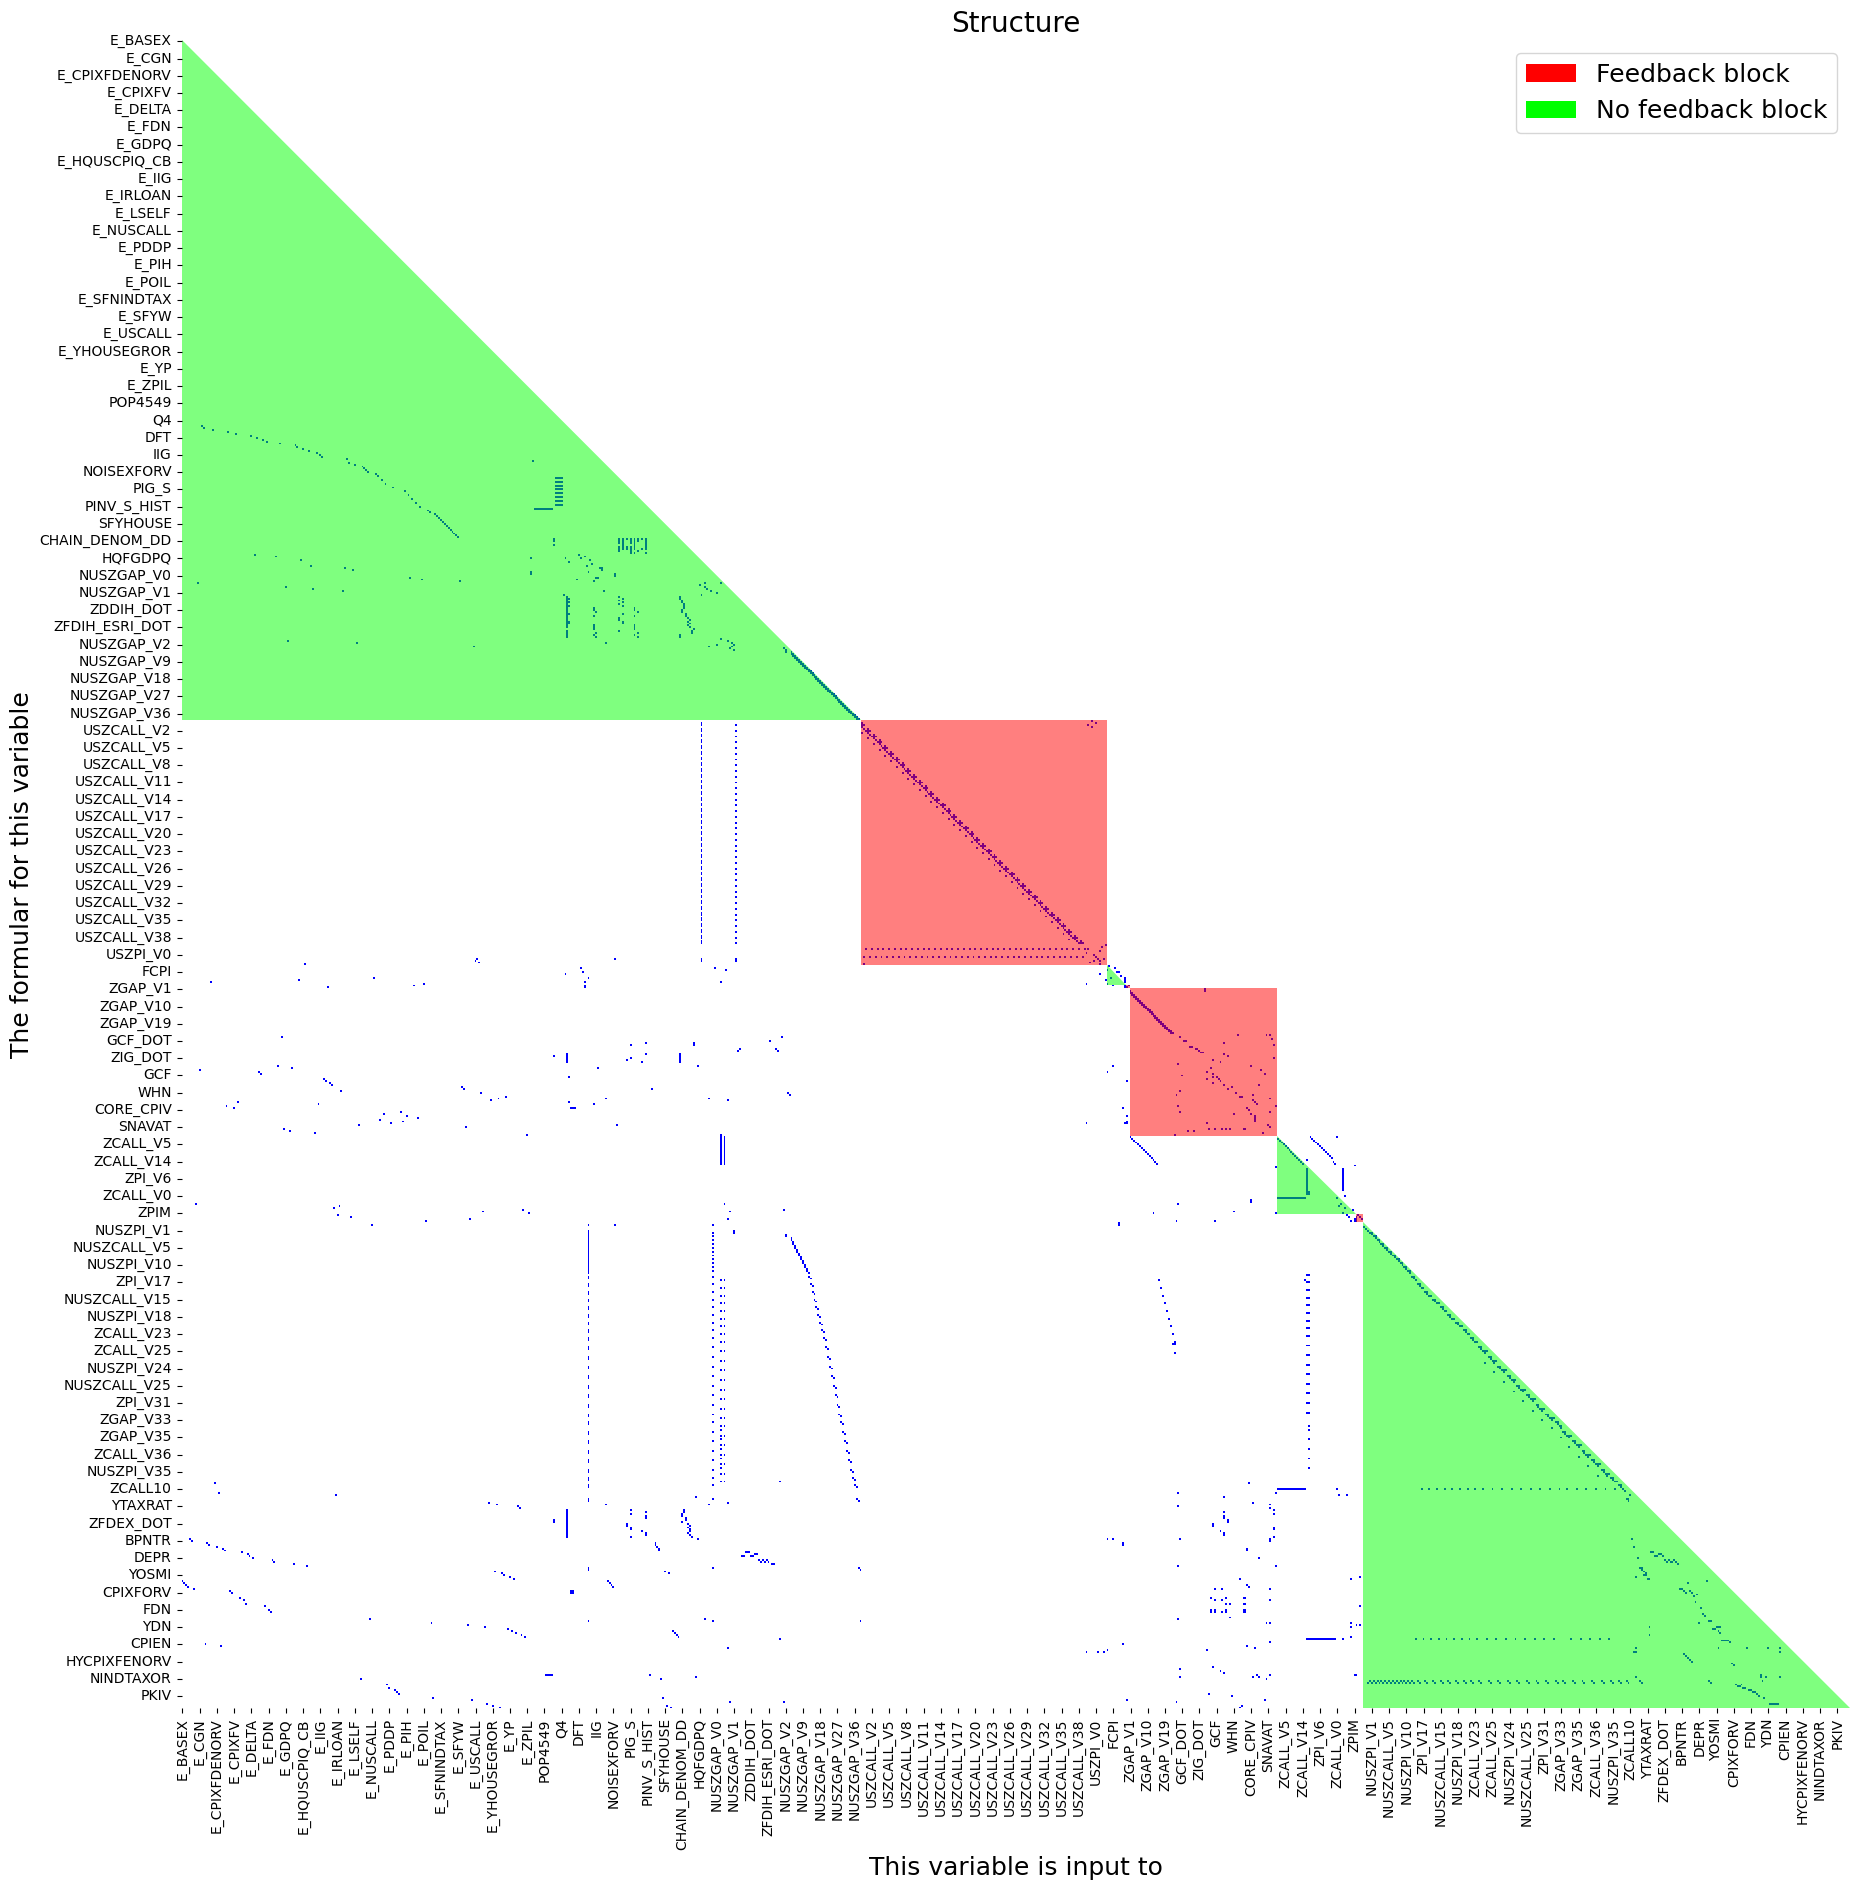

In [12]:
mqjem.plotadjacency(size=(19,19));  # delete the # in front to display, takes some time

## Draw the causal structuretaking all lags, the economic feedback  

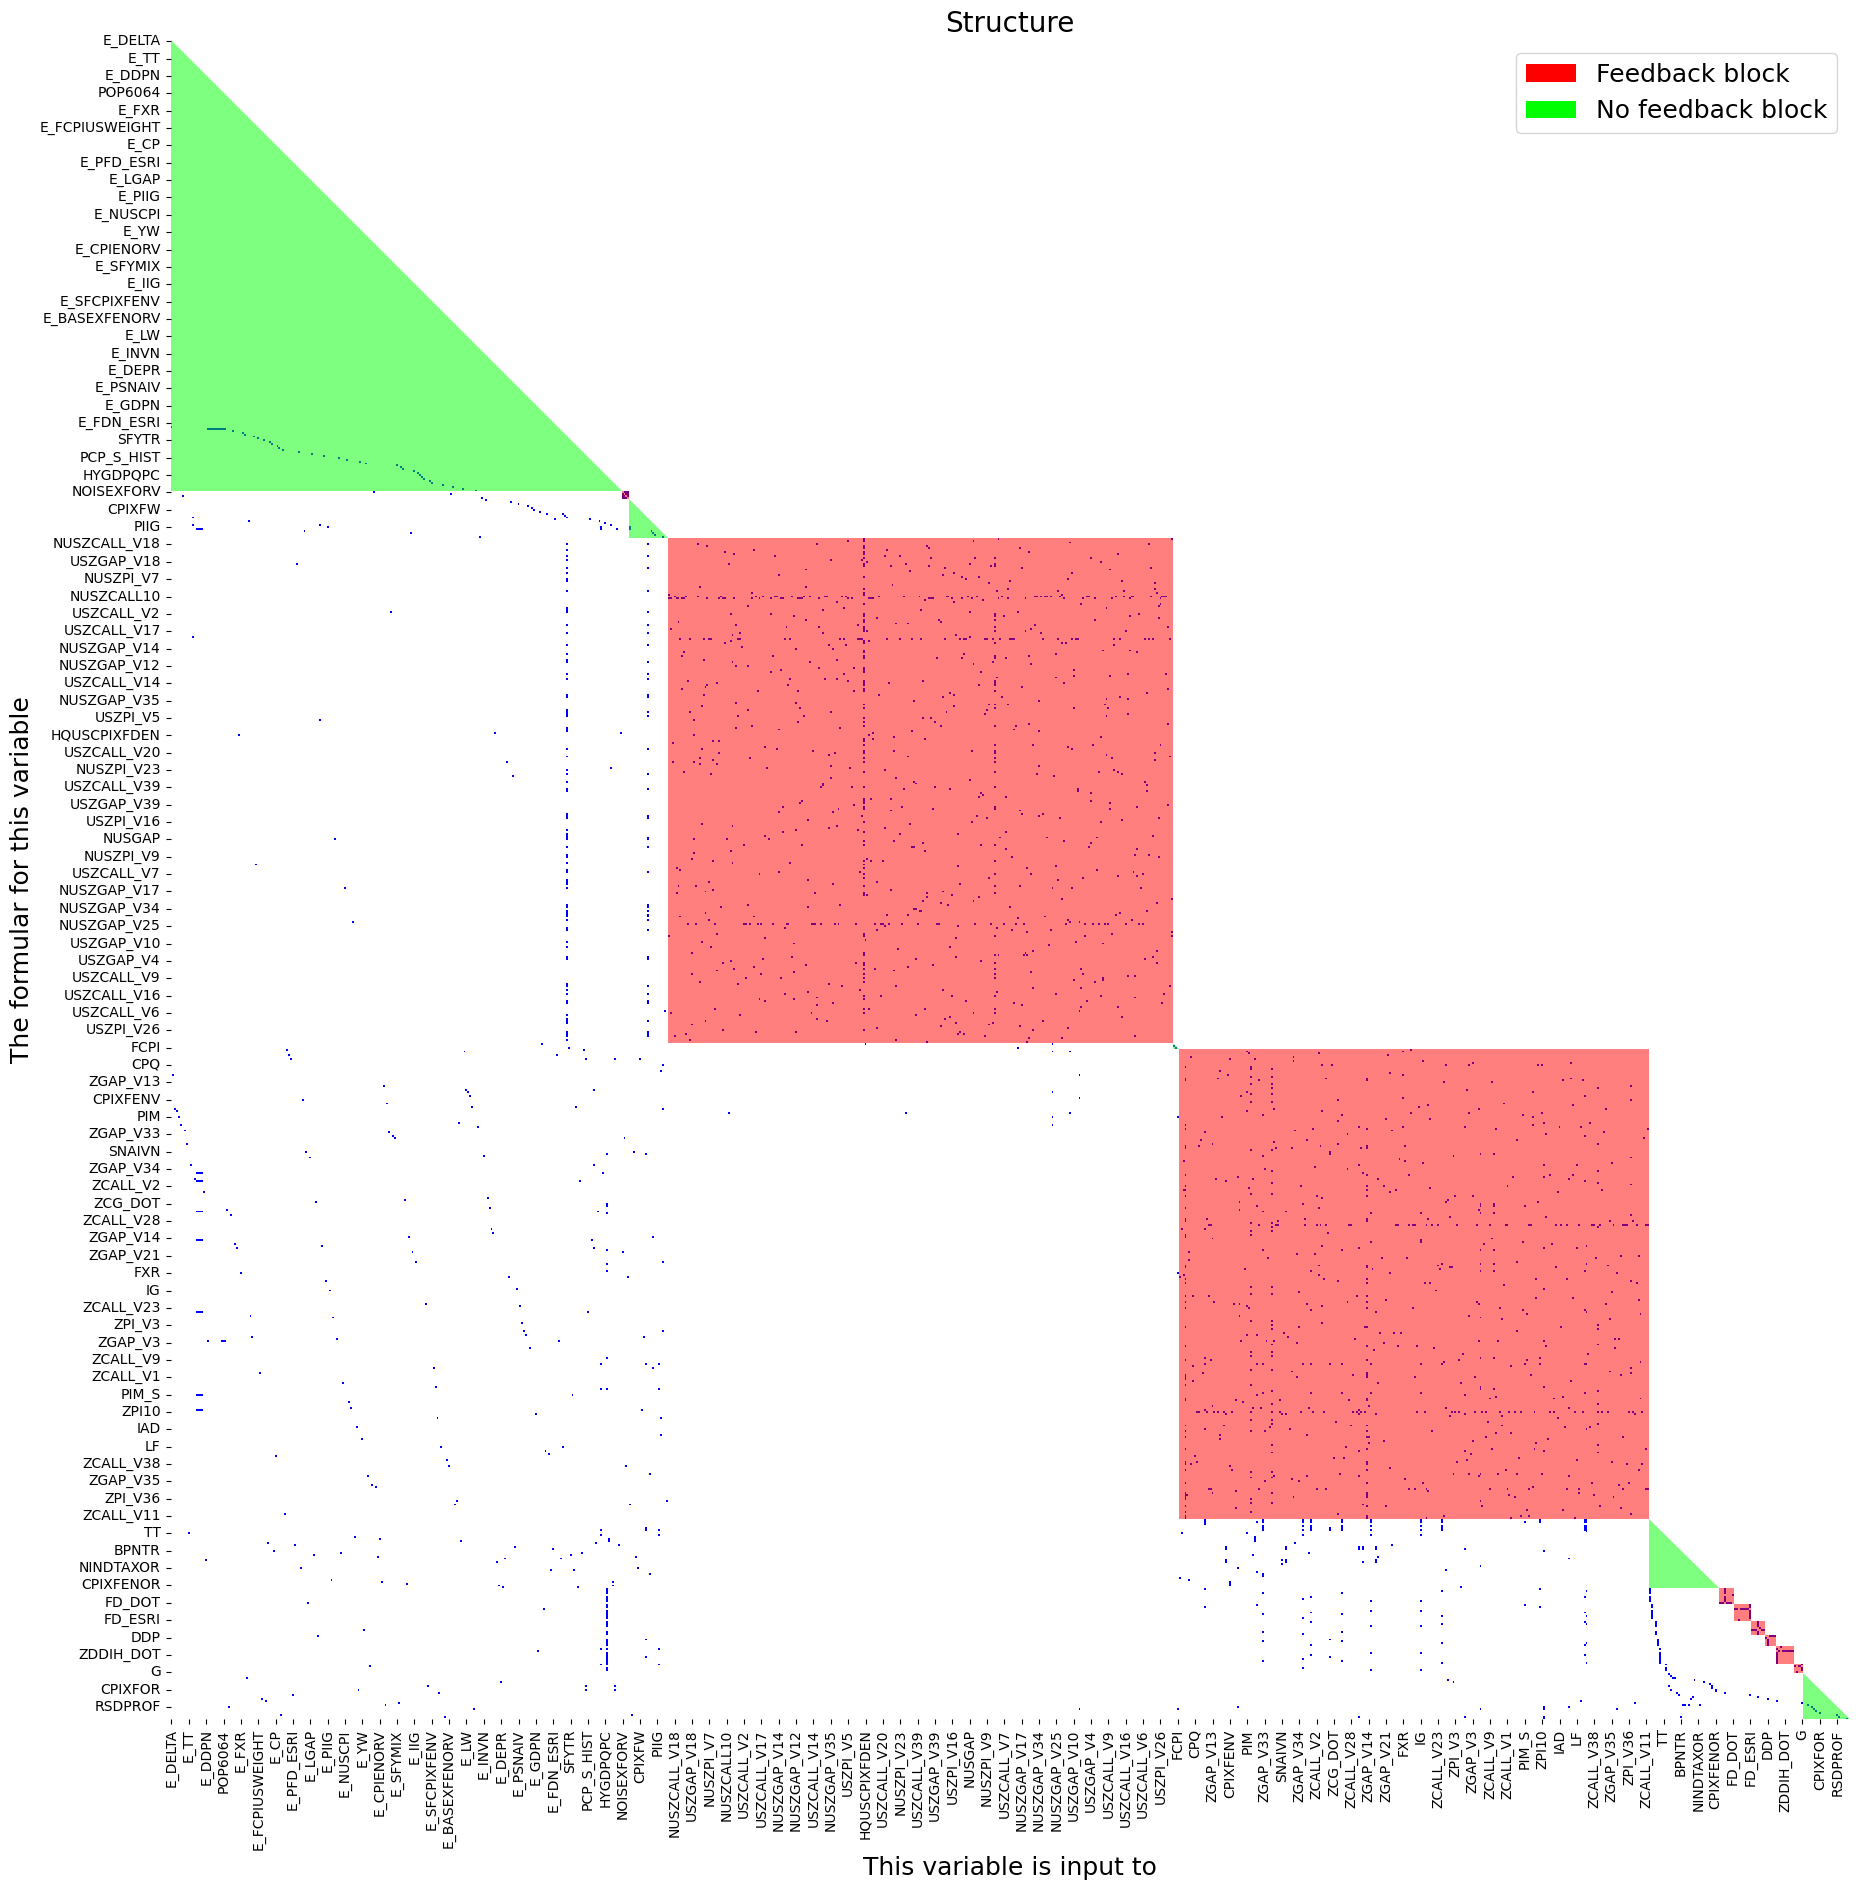

In [13]:
mqjem.plotadjacency(nolag=True,size=(19,19)); # delete the # in front to display, takes some time

## How is CPQ determined 

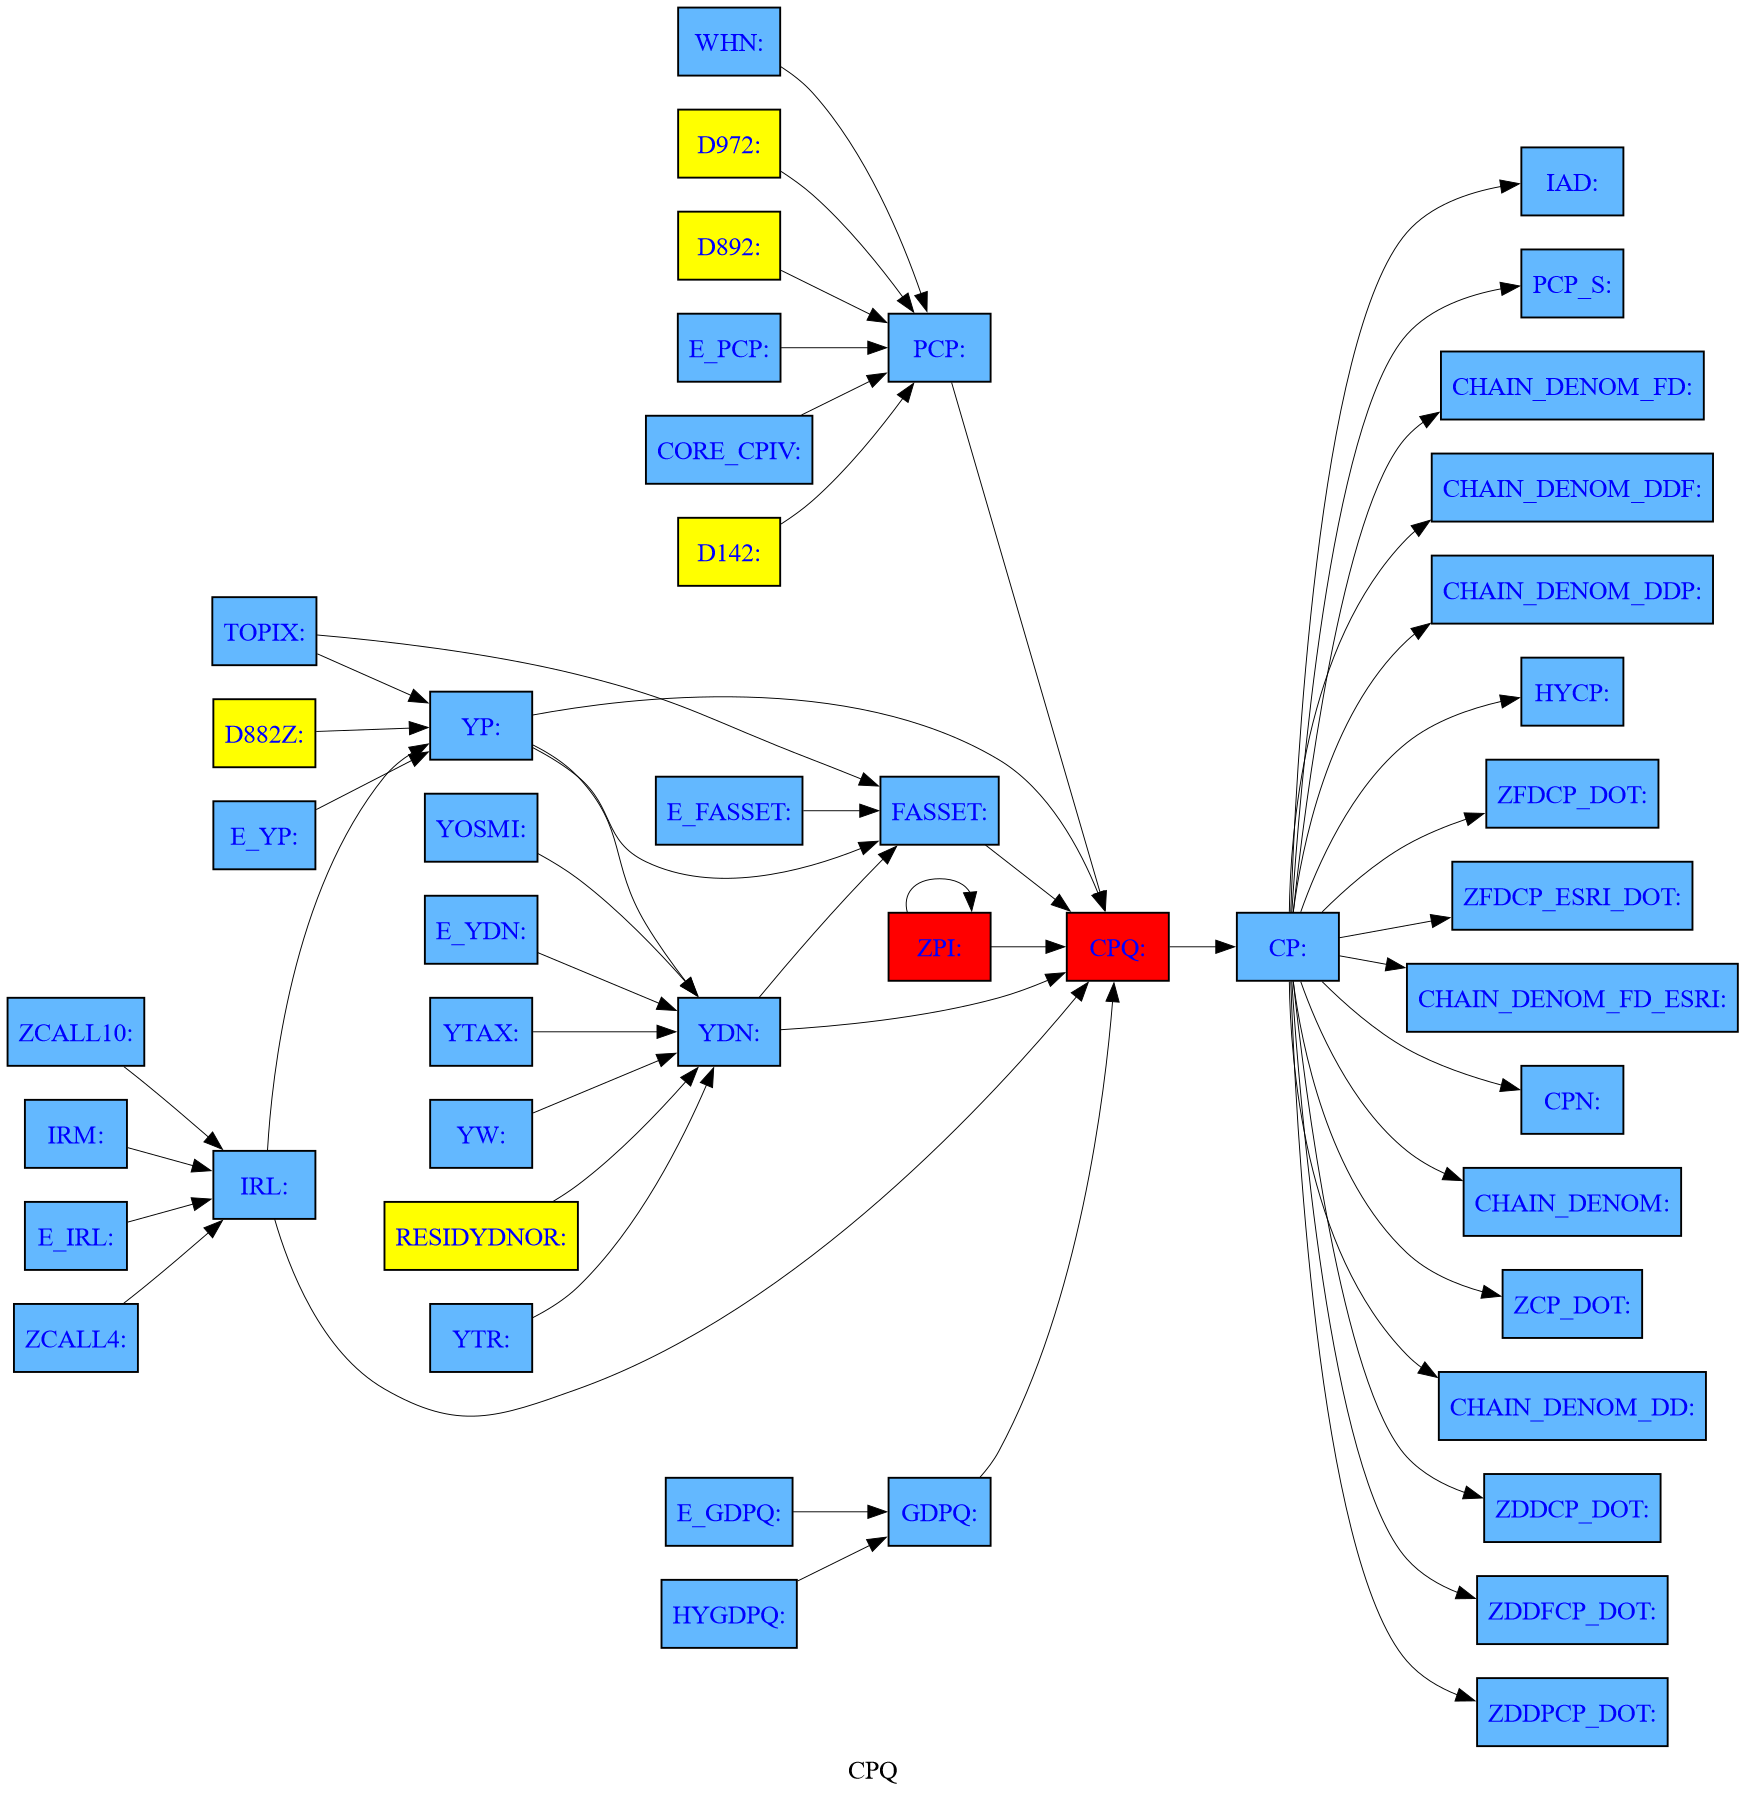

In [14]:
mqjem.cpq.draw(up=2,down=2,HR=0,transdic= {'ZPI*' : 'ZPI'},att = False,png=1) # we condens all ZPI to one, to make the chart easy

In [15]:
mqjem.cpq.draw(up=2,down=2,HR=0,last = True,lpng=1) # we condens all ZPI to one, to make the chart easy

## Also with values 
The result can be inspected in the graph/subfolder in PDF format. 

In [16]:
with mqjem.set_smpl('2001q1','2001q3'):
    mqjem.cpq.draw(up=1,down=1,HR=0,filter=0,last=1) # we condens all ZPI to one, to make the chart easy

## Another Example 
That determins the export (**EX**) and what is EX going into 

In [17]:
mqjem.ex.draw(up=1,down=1,lpng=1)

# The values for EX
We only look at 3 quarters to make it simple

In [18]:
with mqjem.set_smpl('2001q1','2001q3'):
    mqjem.ex.show

Endogeneous: EX: 
Formular: FRML  <> EX = EX(-1)*EXP(E_EX + -0.02639388470328797 + -0.2283080859599746*LOG(EX(-1)/EXQ(-1)) + 0.228685192555833*LOG(EX(-1)/EX(-2)) + 3.603159894694305*LOG(FGDP/FGDP(-1)) + -0.139651427723068*LOG(FXR/FXR(-1))) $

EX  : 
EXQ : 
E_EX: 
FGDP: 
FXR : 

Values :


,2001Q1,2001Q2,2001Q3
Base,"83,528.00","83,528.00","83,528.00"
Last,"83,528.00","83,528.00","83,528.00"
Diff,0.00,0.00,0.00


Input last run:


,2001Q1,2001Q2,2001Q3
EX(-1),"83,528.00","83,528.00","83,528.00"
EX(-2),"83,528.00","83,528.00","83,528.00"
EXQ(-1),"83,202.02","83,202.02","83,202.02"
E_EX,0.03,0.03,0.03
FGDP,"1,015.31","1,015.31","1,015.31"
FGDP(-1),"1,015.31","1,015.31","1,015.31"
FXR,71.07,71.07,71.07
FXR(-1),71.07,71.07,71.07


Input base run:


,2001Q1,2001Q2,2001Q3
EX(-1),"83,528.00","83,528.00","83,528.00"
EX(-2),"83,528.00","83,528.00","83,528.00"
EXQ(-1),"83,202.02","83,202.02","83,202.02"
E_EX,0.03,0.03,0.03
FGDP,"1,015.31","1,015.31","1,015.31"
FGDP(-1),"1,015.31","1,015.31","1,015.31"
FXR,71.07,71.07,71.07
FXR(-1),71.07,71.07,71.07


Difference for input variables


,2001Q1,2001Q2,2001Q3
EX(-1),0.00,0.00,0.00
EX(-2),0.00,0.00,0.00
EXQ(-1),0.00,0.00,0.00
E_EX,0.00,0.00,0.00
FGDP,0.00,0.00,0.00
FGDP(-1),0.00,0.00,0.00
FXR,0.00,0.00,0.00
FXR(-1),0.00,0.00,0.00
